In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])

In [2]:
# import
la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"],low_memory=False)

## Data Overview

In [3]:
la.head(1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0


In [4]:
# types of users
user = la["user_type"].unique()
print(user)

['Walk-up' 'Monthly Pass' 'Annual Pass' 'One Day Pass' 'Flex Pass'
 'Testing']


In [5]:
# number of bikes
bikes = la['bike_id'].unique()
len(bikes)

3140

## Usage During a Day

In [6]:
# new columns 
la["Date"] = la["start_time"].apply(lambda x: x.date())
la["Weekday"]=la["start_time"].apply(lambda x: x.weekday())
la["Hour"]=la["start_time"].apply(lambda x: x.hour)
la['Month']= la["start_time"].apply(lambda x: x.month)
la.head(3)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,Date,Weekday,Hour,Month
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,2019-01-01,1,0,1
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0,2019-01-01,1,0,1
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,2019-01-01,1,0,1


In [7]:
# number of rides for every hour on a day
rides_day = np.zeros(24)
for i in range(24):
    rides_day[i] = la[la['Hour']==i].size
    
time = pd.DataFrame({'Time_Period': range(24), 'Rides': rides_day})
time.head()

,Time_Period,Rides
0,0,56335.0
1,1,32604.0
2,2,21622.0
3,3,8911.0
4,4,11514.0


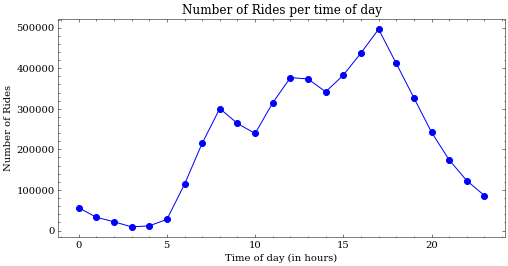

In [8]:
# hourly demand
plt.figure(figsize=(8,4))
plt.plot(time['Time_Period'],time['Rides'],'o-', color='blue')
plt.xlabel("Time of day (in hours)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per time of day")
plt.show()

## Usage During a Week

In [9]:
weekdays =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_week=np.zeros(7)
for i in range(7):
    rides_week[i] = la[la["Weekday"]==i].size
    
weekdaysize = pd.DataFrame({'Weekday': weekdays, 'Rides': rides_week})
weekdaysize

,Weekday,Rides
0,Monday,776815.0
1,Tuesday,837957.0
2,Wednesday,777613.0
3,Thursday,811718.0
4,Friday,843049.0
5,Saturday,660383.0
6,Sunday,672030.0


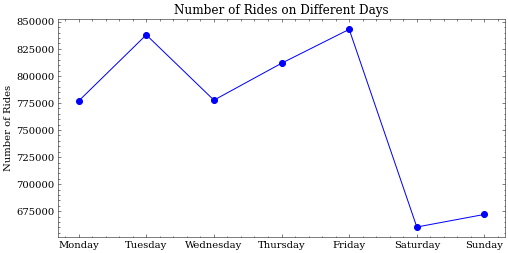

In [10]:
# weekly demand
plt.figure(figsize=(8,4))
plt.plot(weekdaysize["Weekday"], weekdaysize["Rides"],'o-', color='blue')
plt.ylabel("Number of Rides")
plt.title("Number of Rides on Different Days")
plt.show()

## Usage During a Year

In [11]:
months=["January","February","March","April","May","June","July","August","September","Oktober","November","December"]


In [12]:
rides_month = np.zeros(12)
for i in range(12):
    rides_month[i]= la[la["Month"]==i+1].size

year= pd.DataFrame({'Months':months, 'Rides':rides_month})
year

,Months,Rides
0,January,364781.0
1,February,316844.0
2,March,387201.0
3,April,348783.0
4,May,351462.0
5,June,498503.0
6,July,528067.0
7,August,604162.0
8,September,568176.0
9,Oktober,557289.0


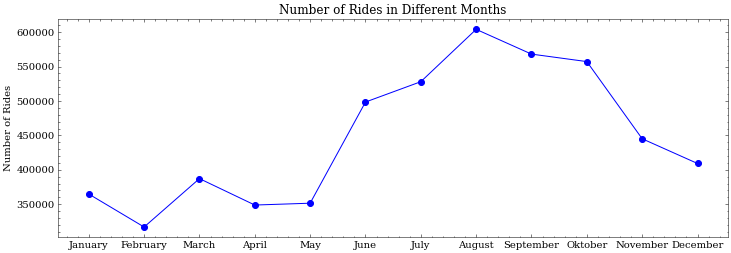

In [13]:
# yearly demand
plt.figure(figsize=(12,4))
plt.plot(year["Months"], year["Rides"],'o-', color='blue')
plt.ylabel("Number of Rides")
plt.title("Number of Rides in Different Months")
plt.show()

## Seasonal Comparison
- Spring: March-May
- Summer: June-August
- Fall: September-November
- Winter: December-February

In [14]:
season =['Spring','Summer','Fall','Winter']
spring = la[(la["Month"]>=3) & (la["Month"]<=5)]
summer = la[(la["Month"]>=6)&(la["Month"]<=8)]
fall = la[(la["Month"]>=9)&(la["Month"]<=11)]
winter = la[(la["Month"]==12) | (la["Month"]<=2)]

In [15]:
season = pd.DataFrame({'Season':season, 'Rides': [spring.size, summer.size, fall.size, winter.size]})
season

,Season,Rides
0,Spring,1087446
1,Summer,1630732
2,Fall,1570578
3,Winter,1090809


In [16]:
rides_week_spring = np.zeros(7)
rides_week_summer = np.zeros(7)
rides_week_fall = np.zeros(7)
rides_week_winter = np.zeros(7)
for i in range(7):
    rides_week_spring[i] = spring[spring["Weekday"]==i].size
    rides_week_summer[i] = summer[summer["Weekday"]==i].size
    rides_week_fall[i] = fall[fall["Weekday"]==i].size
    rides_week_winter[i] = winter[winter["Weekday"]==i].size
    
season_2 = pd.DataFrame({'Weekday': weekdays, 'Spring': rides_week_spring, 'Summer': rides_week_summer, 'Fall': rides_week_fall, 'Winter': rides_week_winter})
season_2

,Weekday,Spring,Summer,Fall,Winter
0,Monday,162716.0,232104.0,232845.0,149150.0
1,Tuesday,161101.0,249432.0,242535.0,184889.0
2,Wednesday,157035.0,237063.0,229235.0,154280.0
3,Thursday,161994.0,250971.0,228076.0,170677.0
4,Friday,180234.0,245480.0,236626.0,180709.0
5,Saturday,130131.0,215137.0,184186.0,130929.0
6,Sunday,134235.0,200545.0,217075.0,120175.0


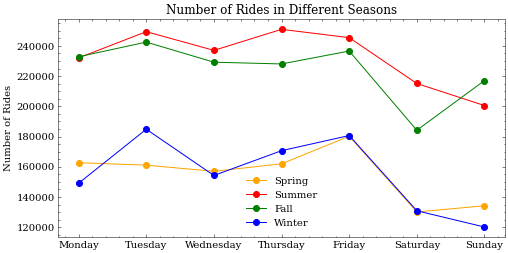

In [17]:
# demand per season
plt.figure(figsize=(8,4))
plt.plot(season_2["Weekday"], season_2["Spring"],'o-', color='orange', label = 'Spring')
plt.plot(season_2["Weekday"], season_2["Summer"],'o-', color='red', label = 'Summer')
plt.plot(season_2["Weekday"], season_2["Fall"],'o-', color='green', label = 'Fall')
plt.plot(season_2["Weekday"], season_2["Winter"],'o-', color='blue', label = 'Winter')
plt.ylabel("Number of Rides")
plt.title("Number of Rides in Different Seasons")
plt.legend()
plt.show()